# NNFL Assignment 1

# Ishan Dixit           -                           2018AAPS0333H

In [ ]:
# Importing datasets to Google Colab
import requests, zipfile, io
r = requests.get( 'https://github.com/dixitishan811/Datasets/blob/master/Datasets-master.zip?raw=true' ) 
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import multi_dot

%matplotlib inline

# Defining helper function

def sigmoid(x):
    return 1/(1+np.exp(-x))

def dist(x, y):
    return np.linalg.norm(x - y)

def dot(x,y):
  temp=0
  for r in range(x.shape[1]):
    temp+=(x[0,r]*y[r])
  return (temp)


# Q.1

# Linear Regression 

In [ ]:
train_features = pd.read_excel('/content/Datasets-master/train_feature.xlsx', header=None)
train_output = pd.read_excel('/content/Datasets-master/train_output.xlsx', header=None)
test_output = pd.read_excel('/content/Datasets-master/test_output.xlsx', header=None)
test_features = pd.read_excel('/content/Datasets-master/test_feature.xlsx', header=None)

# Pre-processing

In [ ]:
train_features = np.array(train_features)
train_output = np.array(train_output)
test_features = np.array(test_features)
test_output = np.array(test_output)
y_mean = np.mean(train_output)
y_std = np.std(train_output)
train_output = (train_output - y_mean) / y_std
x = []
mean = []
std = []
for i in range(train_features.shape[1]):
    x.append((train_features[:, i] - np.mean(train_features[:, i])) /
             np.std(train_features[:, i]))
    mean.append(np.mean(train_features[:, i]))
    std.append(np.std(train_features[:, i]))

train_features = np.array(x)
train = np.append(train_features.T,
                  np.ones([train_features.shape[1], 1]),
                  axis=1)

x = []
for i in range(test_features.shape[1]):
    x.append((test_features[:, i] - mean[i]) / std[i])

test_features = np.array(x)
test = np.append(test_features.T, np.ones([test_features.shape[1], 1]), axis=1)
test_output = (test_output - y_mean) / y_std
np.random.seed(7)

# Batch Gradient Descent

In [ ]:
w = np.random.rand(1, train.shape[1])
alpha = 0.0001
cost = []
wt = []
iters = 300

for i in range(iters):

    m = 0
    J = 0
    hw = []
    for j in range(train.shape[0]):
        hw.append(dot(w, train[j]))

    for k in range(train.shape[0]):
        J = J + 1 / 2 * (hw[k] - train_output[k])**2
    temp = []
    for l in range(w.shape[1]):
        s = 0
        for m in range(train.shape[0]):
            s = s + (hw[m] - train_output[m]) * train[m, l]
        w[0, l] = w[0, l] - alpha * s
        temp.append(w[0, l])
    wt.append(np.array(temp))
    cost.append(J)

wt1 = np.array(wt)
wx = wt1[:, 0].reshape(1, -1).T
wy = wt1[:, 1].reshape(1, -1).T

# Plots

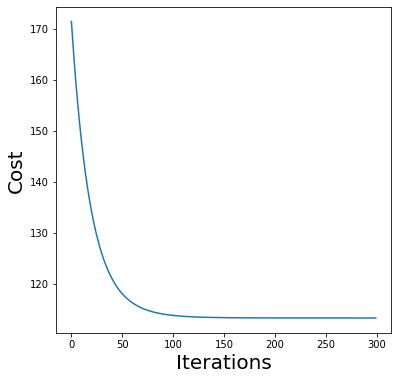

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Iterations', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
plt.plot(cost)

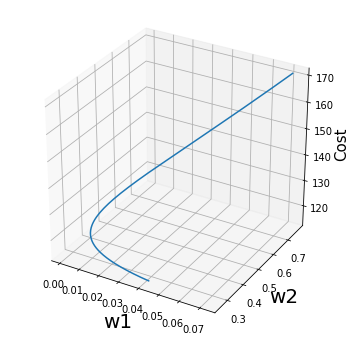

In [ ]:
d, y = np.meshgrid(wx, wy)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')

ax.plot(wx.flatten(), wy.flatten(), np.array(cost).flatten())
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=20)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
plt.show()

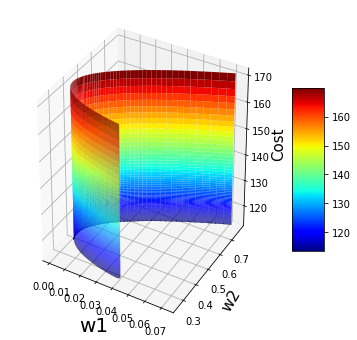

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
surf=ax.plot_surface(wx,
                wy,
                np.transpose(cost),
                rstride=1,
                cstride=1,
                cmap=jet,
                linewidth=0)
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=16, rotation=60)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Calculating MSE for Test dataset

In [ ]:
mse = 0
for j in range(test.shape[0]):
    x = (dot(w, test[j]))
    mse = mse + 0.5 * (1 / test.shape[0]) * (x - test_output[j])**2
print(mse)

[1.23834906]


# Q.2

# Stochastic Gradient Descent

In [ ]:
w = np.random.rand(1, train.shape[1])
alpha = 0.001
cost = []
wt = []
iters = 100
for i in range(iters):
    m = 0
    J = 0
    hw = []
    for j in range(train.shape[0]):
        hw.append(dot(w, train[j]))

    hw = np.array(hw)
    for k in range(train.shape[0]):
        J = J + 0.5 * (hw[k] - train_output[k])**2

    for m in range(train.shape[0]):
        temp = []
        for l in range(w.shape[1]):
            s = (hw[m] - train_output[m]) * train[m, l] 
            w[0, l] = w[0, l] - alpha * s
            temp.append(w[0, l])
    wt.append(np.array(temp))
    cost.append(J)

wt1 = np.array(wt)
wx = wt1[:, 0].reshape(1, -1).T
wy = wt1[:, 1].reshape(1, -1).T

# Plots

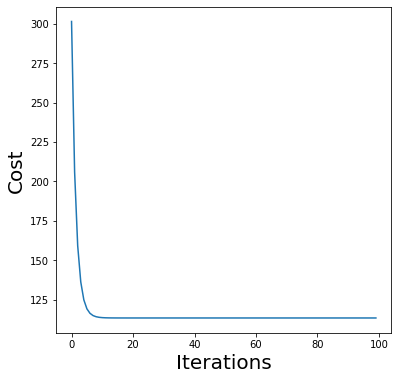

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Iterations', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
plt.plot(cost)

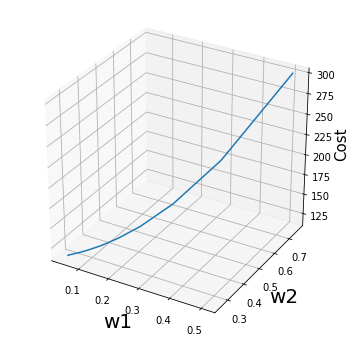

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
ax.plot(wx.flatten(), wy.flatten(), np.array(cost).flatten())
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=20)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
plt.show()

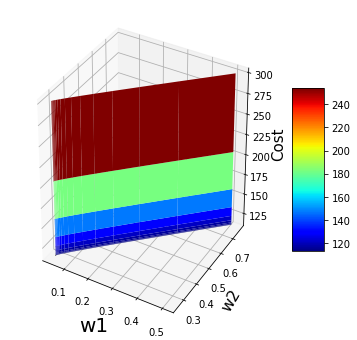

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
surf=ax.plot_surface(wx,
                wy,
                np.transpose(cost),
                rstride=1,
                cstride=1,
                cmap=jet,
                linewidth=0)
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=16, rotation=60)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Calculating MSE for Test dataset

In [ ]:
mse = 0
for j in range(test.shape[0]):
    x = (dot(w, test[j]))
    mse = mse + 0.5 * (1 / test.shape[0]) * (x - test_output[j])**2
print(mse)

[1.23826675]


# Mini batch Gradient Descent

In [ ]:
w = np.random.rand(1, train_features.shape[0] + 1)

alpha = 0.0001
cost = []
wt = []
iters = 150
wt1 = []
for i in range(iters):
    m = 0
    J = 0
    Hw = []
    batch_size = 32
    mini_batches = []
    data = np.hstack((train, train_output))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size

    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1) * batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))

    for mini_batch in mini_batches:
        hw = []
        X_mini, y_mini = mini_batch
        for j in range(X_mini.shape[0]):
            hw.append(dot(w, X_mini[j]))

        for k in range(X_mini.shape[0]):
            J = J + 1 / 2 * (hw[k] - y_mini[k])**2
        wt = []
        for l in range(w.shape[1]):
            s = 0
            for m in range(X_mini.shape[0]):
                s = s + (hw[m] - y_mini[m]) * X_mini[m, l]
            w[0, l] = w[0, l] - alpha * s
            wt.append(w[0, l])
    wt1.append(np.array(wt))

    cost.append(J)

wt1 = np.array(wt1)
wx = wt1[:, 0].reshape(1, -1).T
wy = wt1[:, 1].reshape(1, -1).T

# Plots

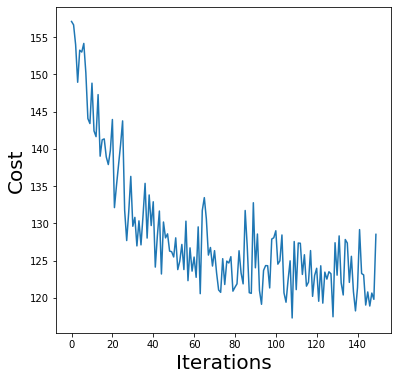

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Iterations', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
plt.plot(cost)

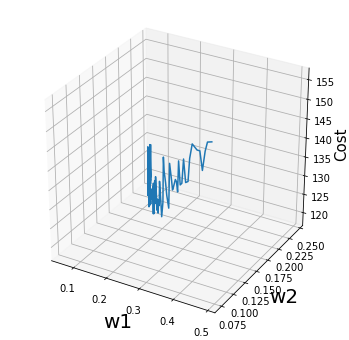

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
ax.plot(wx.flatten(), wy.flatten(), np.array(cost).flatten())
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=20)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
plt.show()

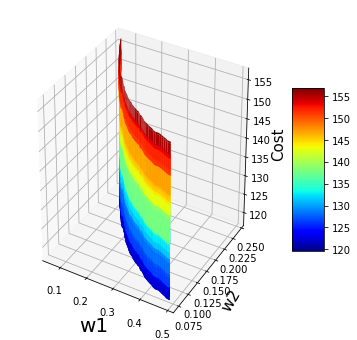

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
surf=ax.plot_surface(wx,
                wy,
                np.transpose(cost),
                rstride=1,
                cstride=1,
                cmap=jet,
                linewidth=0)
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=16, rotation=60)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Calculating MSE for Test dataset

In [ ]:
mse = 0
for j in range(test.shape[0]):
    x = (dot(w, test[j]))
    mse = mse + 0.5 * (1 / test.shape[0]) * (x - test_output[j])**2
print(mse)

[1.24778925]


# Q.3

# Ridge Regression

 ## Stochastic GD

In [ ]:
w = np.random.rand(1, train_features.shape[0] + 1)
alpha = 0.001
cost = []
wt = []
iters = 100
lambd = 0.01
for i in range(iters):
    m = 0
    J = 0
    hw = []
    for j in range(train.shape[0]):
        hw.append(dot(w, train[j]))

    hw = np.array(hw)
    for k in range(train.shape[0]):
        J = J + 0.5 * (hw[k] - train_output[k])**2
    for n in range(w.shape[1]):
        J = J + 0.5 * lambd * w[0, n] * w[0, n]

    for m in range(train.shape[0]):
        temp = []
        for l in range(w.shape[1]):
            s = 0
            s = (hw[m] - train_output[m]) * train[m, l] 
            w[0, l] = (1 - alpha * lambd) * w[0, l] - alpha * s
            temp.append(w[0, l])
    wt.append(np.array(temp))
    cost.append(J)


wt1 = np.array(wt)
wx = wt1[:, 0].reshape(1, -1).T
wy = wt1[:, 1].reshape(1, -1).T

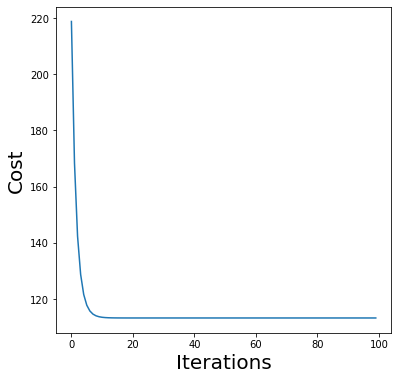

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Iterations', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
plt.plot(cost)

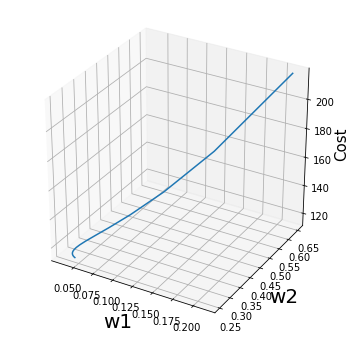

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
ax.plot(wx.flatten(), wy.flatten(), np.array(cost).flatten())
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=20)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
plt.show()

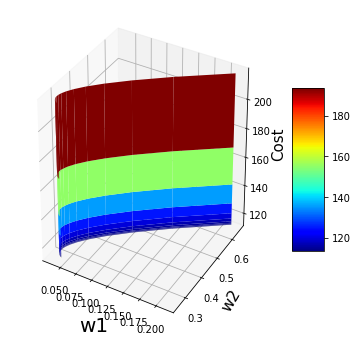

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
surf=ax.plot_surface(wx,
                wy,
                np.transpose(cost),
                rstride=1,
                cstride=1,
                cmap=jet,
                linewidth=0)
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=16, rotation=60)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Calculating MSE for Test dataset

In [ ]:
mse = 0
for j in range(test.shape[0]):
    x = (dot(w, test[j]))
    mse = mse + 0.5 * (1 / test.shape[0]) * (x - test_output[j])**2
print(mse)

[1.24039521]


## Batch GD

In [ ]:
w = np.random.rand(1, train_features.shape[0] + 1)
alpha = 0.001
cost = []
wt = []
iters = 100
lambd = 0.1
for i in range(iters):

    m = 0
    J = 0
    hw = []
    for j in range(train.shape[0]):
        hw.append(dot(w, train[j]))

    for k in range(train.shape[0]):
        J = J + 0.5 * (hw[k] - train_output[k])**2

    for n in range(w.shape[1]):
        J = J + 0.5 * lambd * w[0, n] * w[0, n]

    temp = []
    for l in range(w.shape[1]):
        s = 0
        for m in range(train.shape[0]):
            s = s + (hw[m] - train_output[m]) * train[m, l]
        w[0, l] = (1 - alpha * lambd) * w[0, l] - alpha * s
        temp.append(w[0, l])
    wt.append(np.array(temp))
    cost.append(J)
wt = np.array(wt)
wx = wt[:, 0].reshape(1, -1).T
wy = wt[:, 1].reshape(1, -1).T

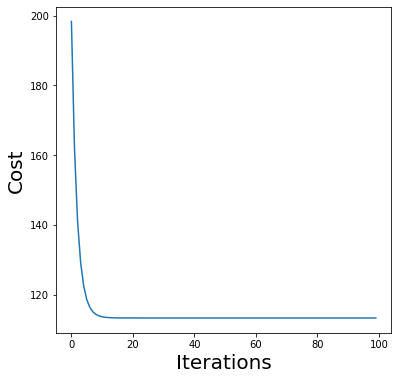

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Iterations', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
plt.plot(cost)

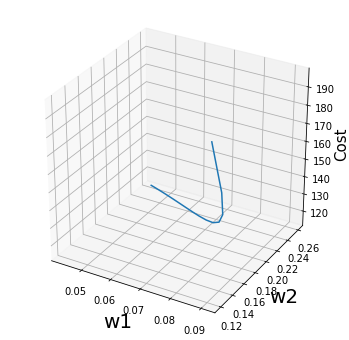

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
ax.plot(wx.flatten(), wy.flatten(), np.array(cost).flatten())
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=20)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
plt.show()

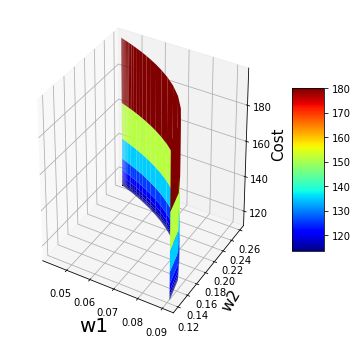

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
surf=ax.plot_surface(wx,
                wy,
                np.transpose(cost),
                rstride=1,
                cstride=1,
                cmap=jet,
                linewidth=0)
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=16, rotation=60)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Calculating MSE for Test dataset

In [ ]:
mse = 0
for j in range(test.shape[0]):
    x = (dot(w, test[j]))
    mse = mse + 0.5 * (1 / test.shape[0]) * (x - test_output[j])**2
print(mse)

[1.23835403]


## Mini Batch GD

In [ ]:
w = np.random.rand(1, train_features.shape[0] + 1)

alpha = 0.0001
cost = []
wt = []
iters = 150
wt1 = []
lambd = 0
for i in range(iters):
    m = 0
    J = 0
    Hw = []
    batch_size = 32
    mini_batches = []
    data = np.hstack((train, train_output))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size

    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1) * batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))

    for mini_batch in mini_batches:
        hw = []
        X_mini, y_mini = mini_batch
        for j in range(X_mini.shape[0]):
            hw.append(dot(w, X_mini[j]))

        for k in range(X_mini.shape[0]):
            J = J + 1 / 2 * (hw[k] - y_mini[k])**2
        for n in range(w.shape[1]):
            J = J + 0.5 * lambd * w[0, n] * w[0, n]
        wt = []
        for l in range(w.shape[1]):
            s = 0
            for m in range(X_mini.shape[0]):
                s = s + (hw[m] - y_mini[m]) * X_mini[m, l]
            w[0, l] = (1 - alpha * lambd) * w[0, l] - alpha * s
            wt.append(w[0, l])
    wt1.append(np.array(wt))

    cost.append(J)

wt1 = np.array(wt1)
wx = wt1[:, 0].reshape(1, -1).T
wy = wt1[:, 1].reshape(1, -1).T

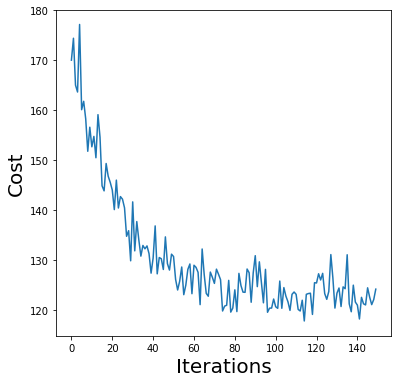

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Iterations', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
plt.plot(cost)

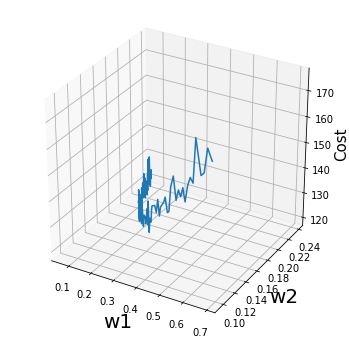

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
ax.plot(wx.flatten(), wy.flatten(), np.array(cost).flatten())
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=20)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
plt.show()

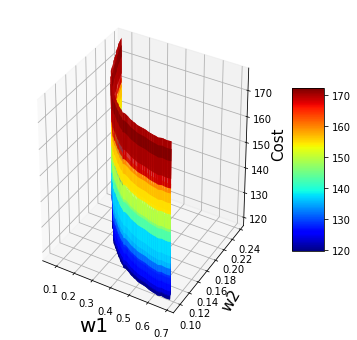

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
surf=ax.plot_surface(wx,
                wy,
                np.transpose(cost),
                rstride=1,
                cstride=1,
                cmap=jet,
                linewidth=0)
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=16, rotation=60)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Calculating MSE for Test dataset

In [ ]:
mse = 0
for j in range(test.shape[0]):
    x = (dot(w, test[j]))
    mse = mse + 0.5 * (1 / test.shape[0]) * (x - test_output[j])**2
print(mse)

[1.24405474]


# Q.4

# LAR

## SGD

In [ ]:
w = np.random.rand(1, train_features.shape[0] + 1)
alpha = 0.001
cost = []
wt = []
iters = 100
lambd = 0.01
for i in range(iters):
    m = 0
    J = 0
    hw = []
    for j in range(train.shape[0]):
        hw.append(dot(w, train[j]))

    hw = np.array(hw)
    for k in range(train.shape[0]):
        J = J + 0.5 * (hw[k] - train_output[k])**2
    for n in range(w.shape[1]):
        J = J + 0.5 * lambd * np.absolute(w[0, n])

    for m in range(train.shape[0]):
        temp = []
        for n in range(w.shape[1]):
            J = J + 0.5 * lambd * w[0, n] * w[0, n]
        for l in range(w.shape[1]):
            s = 0
            s = (hw[m] - train_output[m]) * train[m, l]
            w[0, l] = (w[0, l] - alpha * lambd * np.sign(w[0, l])) - alpha * s
            temp.append(w[0, l])
    wt.append(np.array(temp))
    cost.append(J)
wt1 = np.array(wt)
wx = wt1[:, 0].reshape(1, -1).T
wy = wt1[:, 1].reshape(1, -1).T

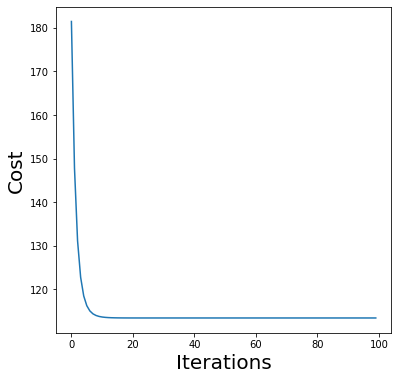

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Iterations', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
plt.plot(cost)

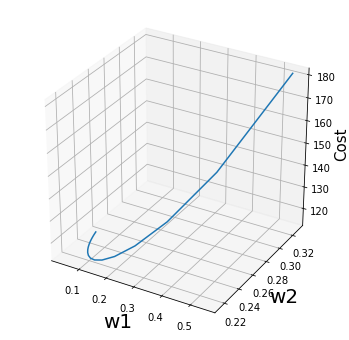

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
ax.plot(wx.flatten(), wy.flatten(), np.array(cost).flatten())
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=20)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
plt.show()

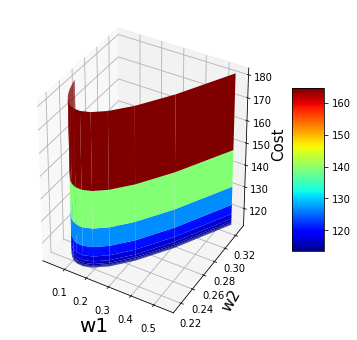

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
surf=ax.plot_surface(wx,
                wy,
                np.transpose(cost),
                rstride=1,
                cstride=1,
                cmap=jet,
                linewidth=0)
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=16, rotation=60)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Calculating MSE for Test dataset

In [ ]:
mse = 0
for j in range(test.shape[0]):
    x = (dot(w, test[j]))
    mse = mse + 0.5 * (1 / test.shape[0]) * (x - test_output[j])**2
print(mse)

[1.24804307]


## Batch GD

In [ ]:
w = np.random.rand(1, train_features.shape[0] + 1)
alpha = 0.001
cost = []
wt = []
iters = 100
lambd = 0.01
for i in range(iters):

    m = 0
    J = 0
    hw = []
    for j in range(train.shape[0]):
        hw.append(dot(w, train[j]))

    for k in range(train.shape[0]):
        J = J + 0.5 * (hw[k] - train_output[k])**2

    for n in range(w.shape[1]):
        J = J + 0.5 * lambd * np.absolute(w[0, n])

    temp = []
    for l in range(w.shape[1]):
        s = 0
        for m in range(train.shape[0]):
            s = s + (hw[m] - train_output[m]) * train[m, l]
        w[0, l] = (w[0, l] - alpha * lambd * np.sign(w[0, l])) - alpha * s
        temp.append(w[0, l])
    wt.append(np.array(temp))
    cost.append(J)
wt = np.array(wt)
wx = wt[:, 0].reshape(1, -1).T
wy = wt[:, 1].reshape(1, -1).T

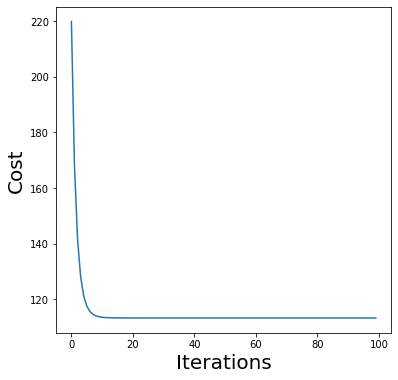

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Iterations', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
plt.plot(cost)

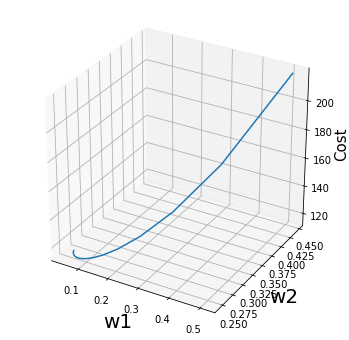

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
ax.plot(wx.flatten(), wy.flatten(), np.array(cost).flatten())
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=20)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
plt.show()

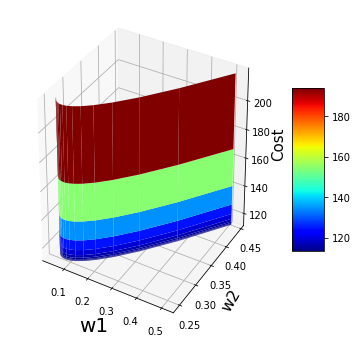

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
surf=ax.plot_surface(wx,
                wy,
                np.transpose(cost),
                rstride=1,
                cstride=1,
                cmap=jet,
                linewidth=0)
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=16, rotation=60)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Calculating MSE for Test dataset

In [ ]:
mse = 0
for j in range(test.shape[0]):
    x = (dot(w, test[j]))
    mse = mse + 0.5 * (1 / test.shape[0]) * (x - test_output[j])**2
print(mse)

[1.23830589]


## Mini Batch GD

In [ ]:
w = np.random.rand(1, train_features.shape[0] + 1)

alpha = 0.0001
cost = []
wt = []
iters = 150
wt1 = []
lambd = 0.001
for i in range(iters):
    m = 0
    J = 0
    Hw = []
    batch_size = 32
    mini_batches = []
    data = np.hstack((train, train_output))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size

    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1) * batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))

    for mini_batch in mini_batches:
        hw = []
        X_mini, y_mini = mini_batch
        for j in range(X_mini.shape[0]):
            hw.append(dot(w, X_mini[j]))

        for k in range(X_mini.shape[0]):
            J = J + 1 / 2 * (hw[k] - y_mini[k])**2
        for n in range(w.shape[1]):
            J = J + 0.5 * lambd * np.absolute(w[0, n])
        wt = []
        for l in range(w.shape[1]):
            s = 0
            for m in range(X_mini.shape[0]):
                s = s + (hw[m] - y_mini[m]) * X_mini[m, l]
            w[0, l] = (w[0, l] - alpha * lambd * np.sign(w[0, l])) - alpha * s
            wt.append(w[0, l])
    wt1.append(np.array(wt))

    cost.append(J)

wt1 = np.array(wt1)
wx = wt1[:, 0].reshape(1, -1).T
wy = wt1[:, 1].reshape(1, -1).T

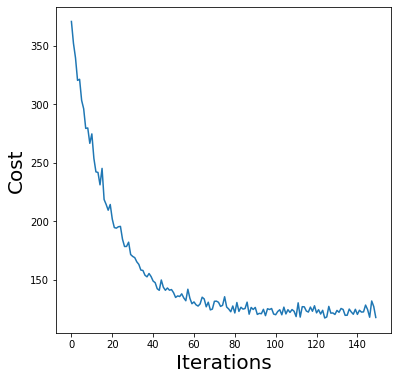

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Iterations', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
plt.plot(cost)

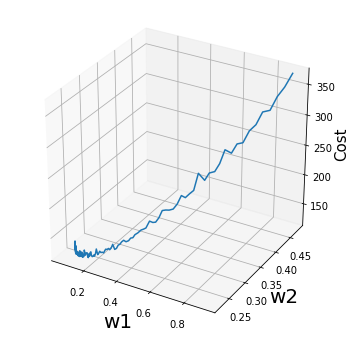

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
ax.plot(wx.flatten(), wy.flatten(), np.array(cost).flatten())
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=20)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
plt.show()

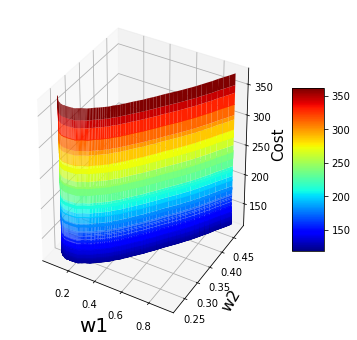

In [ ]:
d, y = np.meshgrid(wx, wy)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
jet = plt.get_cmap('jet')
surf=ax.plot_surface(wx,
                wy,
                np.transpose(cost),
                rstride=1,
                cstride=1,
                cmap=jet,
                linewidth=0)
ax.set_xlabel('w1', fontsize=20)
ax.set_ylabel('w2', fontsize=16, rotation=60)
ax.set_zlabel('Cost', fontsize=15, rotation=90)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Calculating MSE for Test dataset

In [ ]:
mse = 0
for j in range(test.shape[0]):
    x = (dot(w, test[j]))
    mse = mse + 0.5 * (1 / test.shape[0]) * (x - test_output[j])**2
print(mse)

[1.26615275]


# Q.5

## Vectorization

In [ ]:
train_vec=train
out=train_output
test_vec=test
out_test=test_output

In [ ]:
lambd=0.001
# Vectorization based Linear regression

w1 = multi_dot([(np.linalg.inv(np.dot(train_vec.T,train_vec))),train_vec.T,out]).T

# Vectorization based Ridge regression

w2 = multi_dot([(np.linalg.inv(np.dot(train_vec.T,train_vec)))+lambd*np.identity(3),train_vec.T,out]).T

# Vectorization based Least Angle regression
# w3 is taking sgn(w) as +1 and w3_ is taking sgn(w) as -1

w3 = np.dot(np.linalg.inv(np.dot(train_vec.T,train_vec)),np.dot(train_vec.T,out)+lambd*0.5).T
w3_ = np.dot(np.linalg.inv(np.dot(train_vec.T,train_vec)),np.dot(train_vec.T,out)-lambd*0.5).T
print("Difference between weights :",w3-w3_)

Difference between weights : [[3.21005883e-06 3.21005883e-06 4.08163265e-06]]


In [ ]:
# Not much difference between weights in case of Vectorized LAR hence any one of them can be selected.

## Calculating MSE for Test dataset

In [ ]:
mse = 0
for j in range(test_vec.shape[0]):
    x = (dot(w1, test_vec[j]))
    mse = mse + 0.5 * (1 / test_vec.shape[0]) * (x - out_test[j])**2
print(mse)

[1.23826675]


In [ ]:
mse = 0
for j in range(test_vec.shape[0]):
    x = (dot(w2, test_vec[j]))
    mse = mse + 0.5 * (1 / test_vec.shape[0]) * (x - out_test[j])**2
print(mse)

[1.169935]


In [ ]:
mse = 0
for j in range(test_vec.shape[0]):
    x = (dot(w3_, test_vec[j]))
    mse = mse + 0.5 * (1 / test_vec.shape[0]) * (x - out_test[j])**2
print(mse)

[1.23826606]


In [ ]:
#batch
w = np.random.rand(1, train.shape[1])
alpha = 0.0001
cost = []
wt = []
iters = 300

for i in range(iters):

    m = 0
    J = 0
    hw = []
    for j in range(train.shape[0]):
        hw.append(dot(w, train[j]))

    for k in range(train.shape[0]):
        J = J + 1 / 2 * (hw[k] - train_output[k])**2
    temp = []
    for l in range(w.shape[1]):
        s = 0
        for m in range(train.shape[0]):
            s = s + (hw[m] - train_output[m]) * train[m, l]
        w[0, l] = w[0, l] - alpha * s
        temp.append(w[0, l])
    wt.append(np.array(temp))
    cost.append(J)

wt_batch=w

In [ ]:
#stochastic
w = np.random.rand(1, train.shape[1])
alpha = 0.001
cost = []
wt = []
iters = 100
for i in range(iters):
    m = 0
    J = 0
    hw = []
    for j in range(train.shape[0]):
        hw.append(dot(w, train[j]))

    hw = np.array(hw)
    for k in range(train.shape[0]):
        J = J + 0.5 * (hw[k] - train_output[k])**2

    for m in range(train.shape[0]):
        temp = []
        for l in range(w.shape[1]):
            s = (hw[m] - train_output[m]) * train[m, l] 
            w[0, l] = w[0, l] - alpha * s
            temp.append(w[0, l])
    wt.append(np.array(temp))
    cost.append(J)

wt_st=w

In [ ]:
#mini batch
w = np.random.rand(1, train_features.shape[0] + 1)

alpha = 0.0001
cost = []
wt = []
iters = 150
wt1 = []
for i in range(iters):
    m = 0
    J = 0
    Hw = []
    batch_size = 32
    mini_batches = []
    data = np.hstack((train, train_output))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size

    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1) * batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))

    for mini_batch in mini_batches:
        hw = []
        X_mini, y_mini = mini_batch
        for j in range(X_mini.shape[0]):
            hw.append(dot(w, X_mini[j]))

        for k in range(X_mini.shape[0]):
            J = J + 1 / 2 * (hw[k] - y_mini[k])**2
        wt = []
        for l in range(w.shape[1]):
            s = 0
            for m in range(X_mini.shape[0]):
                s = s + (hw[m] - y_mini[m]) * X_mini[m, l]
            w[0, l] = w[0, l] - alpha * s
            wt.append(w[0, l])
    wt1.append(np.array(wt))

    cost.append(J)

wt_mb=w

**Comparision of the weight parameters of vectorization-based methods with the weights obtained using batch, mini- batch and stochastic gradient descent-based algorithms**

In [ ]:
print("Weights of Batch GD,Stochastic GD,Mini Batch GD",wt_batch,wt_st,wt_mb)
print("Weights of Vectorization",w1,w2,w3)

Weights of Batch GD,Stochastic GD,Mini Batch GD [[4.40205633e-02 2.58072772e-01 5.78502265e-05]] [[4.30528646e-02 2.58988001e-01 1.47899271e-13]] [[0.04406326 0.25759594 0.01063263]]
Weights of Vectorization [[ 4.30528649e-02  2.58988001e-01 -2.09124023e-16]] [[ 7.08288981e-02  3.25303970e-01 -1.98021793e-16]] [[4.30544700e-02 2.58989606e-01 2.04081633e-06]]


 # Q.6

# Kmeans

In [1]:
df = pd.read_excel('/content/Datasets-master/data2.xlsx')
vec = df.to_numpy()
print(vec)
#Kmeans
def Kmeans(train, k=30, max_iter=1000):
    k = k

    def dist(x, y):
        return (np.sum((x - y)**2, axis=-1))**0.5

    points = np.random.randint(train.shape[0], size=(k))

    centroids = [train[i] for i in points]

    centroids = np.array(centroids)

    max_iter = max_iter

    for i in range(max_iter):
        pred = [np.argmin(dist(centroids, x.reshape(1, -1))) for x in train]
        cnt = collections.Counter(pred)
        temp = np.zeros((centroids.shape))
        for i, x in enumerate(pred):
            temp[x] += train[i] / cnt[x]
        centroids = temp

    return centroids, pred

#Plots
print("Plots :","\n")
plot1 = plt.figure(1)
plt.title('Feature 1 vs 2')
plt.scatter(vec[:, 0], vec[:, 1], c=pred, s=40, cmap='viridis')
plot1 = plt.figure(2)
plt.title('Feature 1 vs 3')
plt.scatter(vec[:, 0], vec[:, 2], c=pred, s=40, cmap='viridis')
plot1 = plt.figure(3)
plt.title('Feature 1 vs 4')
plt.scatter(vec[:, 0], vec[:, 3], c=pred, s=40, cmap='viridis')
plot1 = plt.figure(4)
plt.title('Feature 2 vs 3')
plt.scatter(vec[:, 1], vec[:, 2], c=pred, s=40, cmap='viridis')
plot1 = plt.figure(5)
plt.title('Feature 2 vs 4')
plt.scatter(vec[:, 1], vec[:, 3], c=pred, s=40, cmap='viridis')
plot1 = plt.figure(6)
plt.title('Feature 3 vs 4')
plt.scatter(vec[:, 2], vec[:, 3], c=pred, s=40, cmap='viridis')
plt.show()


# Q.7

## Logistic Regression

In [ ]:
df=pd.read_excel('/content/Datasets-master/data3.xlsx')
df.columns =[0, 1,2,3,4] 
df[4] = df[4].replace([2],0)
vec=df.to_numpy()

np.random.seed(42) 
np.random.shuffle(vec)

total=vec.shape[0]
train_len=int(0.6*total)
train_features=vec[:train_len,:4]
test_features=vec[train_len:,:4]
train_output=vec[:train_len,4].reshape(-1,1)
test_output=vec[train_len:,4].reshape(-1,1)

x=[]
mean=[]
std=[]
for i in range(train_features.shape[1]):
    x.append((train_features[:,i]-np.mean(train_features[:,i]))/np.std(train_features[:,i]))
    mean.append(np.mean(train_features[:,i]))
    std.append(np.std(train_features[:,i]))


train_features=np.array(x)
train = np.append(train_features.T,np.ones([train_features.shape[1], 1]),axis=1)

x=[]
for i in range(test_features.shape[1]):
    x.append((test_features[:,i]-mean[i])/std[i])
    
test_features=np.array(x)
test = np.append(test_features.T,np.ones([test_features.shape[1], 1]),axis=1)

In [ ]:
w = np.random.rand(1, train_features.shape[0] + 1)
alpha = 0.001
cost = []
wt = []
iters = 500
for i in range(iters):

    m = 0
    J = 0
    hw = []
    for j in range(train.shape[0]):
        hw.append(sigmoid(dot(w, train[j])))

    for k in range(train.shape[0]):
        J = J -( train_output[k] * np.log(hw[k]) + (1 - train_output[k]) * np.log(1 - hw[k]))
    temp = []
    for l in range(w.shape[1]):
        s = 0
        for m in range(train.shape[0]):
            s = s + ((-train_output[m]  + hw[m])) * train[m, l]
        w[0, l] = w[0, l] - alpha * s
        temp.append(w[0, l])
    cost.append(J)

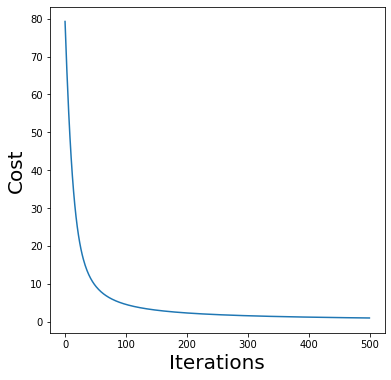

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Iterations', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
plt.plot(cost)

## Accuracy, Sensitivity and Specificity values

In [ ]:
def acc(h,test_output):
    TN = 0
    TP = 0
    FN = 0
    FP = 0
    for i in range(test_output.shape[0]):
        if (h[i] == test_output[i]) & (test_output[i] == 0):
            TN += 1
        elif (h[i] == test_output[i]) & (test_output[i] == 1):
            TP += 1
        elif (h[i] == 0) & (test_output[i] == 1):
            FN += 1
        elif (h[i] == 1) & (test_output[i] == 0):
            FP += 1

    SE=TP/(TP+FN)
    SP=TN/(TN+FP)
    Acc=(TP+TN)/(TP+FN+TN+FP)
    return SE,TP,FN,SP,Acc

In [ ]:
h=[]
for j in range(test.shape[0]):
    h.append(np.round(sigmoid(dot(w, test[j]))))
a,b,c,d,e= acc(h,test_output) 
print("SE ,SP  - ",a,d)
print('Accuracy',e*100,'%')

SE ,SP  -  1.0 1.0
Accuracy 100.0 %


# Q.8

# One Vs All

In [ ]:
df=pd.read_excel('/content/Datasets-master/data4.xlsx',header=None)
vec=df.to_numpy()

In [ ]:
set(df[7]) #Class Labels

{1, 2, 3}

In [ ]:
np.random.seed(42) 
np.random.shuffle(vec)

total=vec.shape[0]
train_len=int(0.6*total)
train_features=vec[:train_len,:7]
test_features=vec[train_len:,:7]
train_output=vec[:train_len,7].reshape(-1,1)
test_output=vec[train_len:,7].reshape(-1,1)

x=[]
mean=[]
std=[]
for i in range(train_features.shape[1]):
    x.append((train_features[:,i]-np.mean(train_features[:,i]))/np.std(train_features[:,i]))
    mean.append(np.mean(train_features[:,i]))
    std.append(np.std(train_features[:,i]))


train_features=np.array(x)
train = np.append(train_features.T,np.ones([train_features.shape[1], 1]),axis=1)

x=[]
for i in range(test_features.shape[1]):
    x.append((test_features[:,i]-mean[i])/std[i])
    
test_features=np.array(x)
test = np.append(test_features.T,np.ones([test_features.shape[1], 1]),axis=1)

In [ ]:
#Preparing data for 1 vs all multiclass classification

train_label=np.zeros(shape=(train_output.shape[0],3))
for i in range(3):
    for j in range(train_output.shape[0]):
        if train_output[j]==i+1:
            train_label[j][i]=1
            
        else:
            train_label[j][i]=0

test_label=np.zeros(shape=(test_output.shape[0],3))
for i in range(3):
    for j in range(test_output.shape[0]):
        if test_output[j]==i+1:
            test_label[j][i]=1
            
        else:
            test_label[j][i]=0

In [ ]:
def logistic_reg(train_output,alpha=0.001,train=train,iters=40):
    w = np.random.rand(1, train.shape[1])
    alpha = alpha
    cost = []
    wt = []
    iters = iters
    for i in range(iters):

        m = 0
        J = 0
        hw = []
        for j in range(train.shape[0]):
            hw.append(sigmoid(dot(w, train[j])))

        for k in range(train.shape[0]):
            J = J -( train_output[k] * np.log(hw[k]) + (1 - train_output[k]) * np.log(1 - hw[k]))
        temp = []
        for l in range(w.shape[1]):
            s = 0
            for m in range(train.shape[0]):
                s = s + ((-train_output[m]  + hw[m])) * train[m, l]
            w[0, l] = w[0, l] - alpha * s
            temp.append(w[0, l])
        cost.append(J)
        
    return cost,w

## Accuracy

In [ ]:
def acc(h,test_output):
    TN = 0
    TP = 0
    FN = 0
    FP = 0
    for i in range(test_output.shape[0]):
        if (h[i] == test_output[i]) & (test_output[i] == 0):
            TN += 1
        elif (h[i] == test_output[i]) & (test_output[i] == 1):
            TP += 1
        elif (h[i] == 0) & (test_output[i] == 1):
            FN += 1
        elif (h[i] == 1) & (test_output[i] == 0):
            FP += 1

    SE=TP/(TP+FN)
    SP=TN/(TN+FP)
    Acc=(TP+TN)/(TP+FN+TN+FP)
    return SE,TP,FN,FP,TN

In [ ]:
cost1,w1=logistic_reg(train_label[:,0],iters=500,alpha=0.001)
cost2,w2=logistic_reg(train_label[:,1],iters=2000,alpha=0.001)
cost3,w3=logistic_reg(train_label[:,2],iters=1800,alpha=0.001)

h1=[]
for j in range(test.shape[0]):
    h1.append(np.round(sigmoid(dot(w1, test[j]))))
h2=[]
for j in range(test.shape[0]):
    h2.append(np.round(sigmoid(dot(w2, test[j]))))
h3=[]
for j in range(test.shape[0]):
    h3.append(np.round(sigmoid(dot(w3, test[j]))))

IA1,tp1,fn1,fp1,tn1=acc(h1,test_label[:,0])
IA2,tp2,fn2,fp2,tn2=acc(h2,test_label[:,1])
IA3,tp3,fn3,fp3,tn3=acc(h3,test_label[:,2])

print("Accuracy Class1 Class2 Class 3 - ",round(IA1*100,4),'%',IA2*100,'%',round(IA3*100,4),'%')
print("Overall Accuracy",round(100*(tp1+tp2+tp3)/(tp1+tp2+tp3+fn1+fn2+fn3),4),'%')

Accuracy Class1 Class2 Class 3 -  100.0 % 100.0 % 91.6667 %
Overall Accuracy 96.6667 %


# One Vs One

In [ ]:
#Preparing data for 1 vs all multiclass classification
train1 = []
train2 = []
train3 = []
label1 = []
label2 = []
label3 = []

for i in range(train_output.shape[0]):
    if train_output[i] == 1 or train_output[i] == 2:
        train1.append(train[i])
        if train_output[i] == 1:
            label1.append(1)
        else:
            label1.append(0)
for i in range(train_output.shape[0]):
    if train_output[i] == 1 or train_output[i] == 3:
        train2.append(train[i])
        if train_output[i] == 1:
            label2.append(1)
        else:
            label2.append(0)
for i in range(train_output.shape[0]):
    if train_output[i] == 2 or train_output[i] == 3:
        train3.append(train[i])
        if train_output[i] == 2:
            label3.append(1)
        else:
            label3.append(0)

In [ ]:
#Calculating weights using logistic regression
cost1,w1=logistic_reg(np.array(label1),train=np.array(train1),iters=1000)
cost2,w2=logistic_reg(np.array(label2),train=np.array(train2),iters=2000,alpha=0.0001)
cost3,w3=logistic_reg(np.array(label3),train=np.array(train3),iters=1500)

In [ ]:
h = []
for j in range(test.shape[0]):
    temp = []
    if np.round(sigmoid(dot(w1, test[j]))) == 1:
        temp.append(1)
    else:
        temp.append(2)
    if np.round(sigmoid(dot(w2, test[j]))) == 1:
        temp.append(1)
    else:
        temp.append(3)
    if np.round(sigmoid(dot(w3, test[j]))) == 1:
        temp.append(2)
    else:
        temp.append(3)

    vals, counts = np.unique(np.array(temp), return_counts=True)
    index = np.argmax(counts)
    h.append(vals[index])

## Accuracy

In [ ]:

IA=[]
_,counts=np.unique(np.array(test_output), return_counts=True)
for j in range(3):
  cnt=0
  for i in range(test.shape[0]):
    if h[i]==test_output[i] and test_output[i]==j+1 :
      cnt+=1
  IA.append(100*cnt/counts[j])
cnt=0
for i in range(test.shape[0]):
  if h[i]==test_output[i]:
    cnt+=1
IA=np.array(IA)
print("Class wise Accuracy : ","Class 1 Class 2 Class 3",round(IA[0],4),'%',round(IA[1],4),'%',round(IA[2],4),'%')
print("Overall Accuracy :",round(100*cnt/test.shape[0],4),'%')

Class wise Accuracy :  Class 1 Class 2 Class 3 100.0 % 100.0 % 87.5 %
Overall Accuracy : 95.0 %


# Q.9

## 5-Fold Cross - Validation

In [ ]:
df=pd.read_excel('/content/Datasets-master/data4.xlsx',header=None)
vec=df.to_numpy()
np.random.seed(1) 
np.random.shuffle(vec)
x=[]
for i in range(vec.shape[1]-1):
    x.append((vec[:,i]-np.mean(vec[:,i]))/np.std(vec[:,i]))
x.append(vec[:,7])
norm_data=np.array(x).T
norm_data = np.insert(norm_data,7, 1,axis=1)

In [ ]:
k=5  # No. of folds
sub_len=int(norm_data.shape[0]/5)
sub_data=[]
start=0
for i in range(k):
    sub_data.append(norm_data[start:start+sub_len,:10])
    start+=sub_len
sub_data=np.array(sub_data)

In [ ]:
def logistic_reg(train,train_output,alpha=0.001,iters=40):
    w = np.random.rand(1, train.shape[1])
    alpha = alpha
    cost = []
    wt = []
    iters = iters
    for i in range(iters):

        m = 0
        J = 0
        hw = []
        for j in range(train.shape[0]):
            hw.append(sigmoid(dot(w, train[j])))

        for k in range(train.shape[0]):
            J = J -( train_output[k] * np.log(hw[k]) + (1 - train_output[k]) * np.log(1 - hw[k]))
        temp = []
        for l in range(w.shape[1]):
            s = 0
            for m in range(train.shape[0]):
                s = s + ((-train_output[m]  + hw[m])) * train[m, l]
            w[0, l] = w[0, l] - alpha * s
            temp.append(w[0, l])
        cost.append(J)
        
    return cost,w

In [ ]:
def acc(h,test_output):
    TN = 0
    TP = 0
    FN = 0
    FP = 0
    for i in range(test_output.shape[0]):
        if (h[i] == test_output[i]) & (test_output[i] == 0):
            TN += 1
        elif (h[i] == test_output[i]) & (test_output[i] == 1):
            TP += 1
        elif (h[i] == 0) & (test_output[i] == 1):
            FN += 1
        elif (h[i] == 1) & (test_output[i] == 0):
            FP += 1

    SE=TP/(TP+FN)
    SP=TN/(TN+FP)
    Acc=(TP+TN)/(TP+FN+TN+FP)
    return TP,FN,SE*100

In [ ]:
cnt = 1
for i in range(k):
    start = 0
    test_data = sub_data[i, :, :8].reshape(-1, 8)
    test_label = sub_data[i, :, 8].reshape(-1, 1)
    temp = np.delete(sub_data, i, axis=0)
    train_data = temp[:, :, :8].reshape(-1, 8)
    train_label = temp[:, :, 8].reshape(-1, 1)

    label1 = np.zeros(shape=(train_label.shape[0], 3))
    for i in range(3):
        for j in range(train_label.shape[0]):
            if train_label[j] == i + 1:
                label1[j][i] = 1

            else:
                label1[j][i] = 0

    label2 = np.zeros(shape=(test_label.shape[0], 3))
    for i in range(3):
        for j in range(test_label.shape[0]):
            if test_label[j] == i + 1:
                label2[j][i] = 1

            else:
                label2[j][i] = 0
    cost1, w1 = logistic_reg(train_data, label1[:, 0])
    cost2, w2 = logistic_reg(train_data, label1[:, 1], iters=1000)
    cost3, w3 = logistic_reg(train_data, label1[:, 2], iters=1500)

    h1 = []
    for j in range(test_data.shape[0]):
        h1.append(np.round(sigmoid(dot(w1, test_data[j]))))
    h2 = []
    for j in range(test_data.shape[0]):
        h2.append(np.round(sigmoid(dot(w2, test_data[j]))))
    h3 = []
    for j in range(test_data.shape[0]):
        h3.append(np.round(sigmoid(dot(w3, test_data[j]))))

    tp1, fn1, acc1 = acc(h1, label2[:, 0])
    tp2, fn2, acc2 = acc(h2, label2[:, 1])
    tp3, fn3, acc3 = acc(h3, label2[:, 2])
    print("Fold", cnt, "\n")
    print("Accuracy Class1 ,Class 2 ,Class 3 - ", round(acc1,4),'%', round(acc2,4),'%', round(acc3,4),'%')
    print("Overall Accuracy",round(((tp1 + tp2 + tp3) / (tp1 + tp2 + tp3 + fn1 + fn2 + fn3)) * 100,4),'%')
    print("\n")
    cnt += 1

Fold 1 

Accuracy Class1 ,Class 2 ,Class 3 -  100.0 % 61.5385 % 100.0 %
Overall Accuracy 83.3333 %


Fold 2 

Accuracy Class1 ,Class 2 ,Class 3 -  100.0 % 87.5 % 92.8571 %
Overall Accuracy 93.3333 %


Fold 3 

Accuracy Class1 ,Class 2 ,Class 3 -  100.0 % 100.0 % 100.0 %
Overall Accuracy 100.0 %


Fold 4 

Accuracy Class1 ,Class 2 ,Class 3 -  100.0 % 77.7778 % 100.0 %
Overall Accuracy 93.3333 %


Fold 5 

Accuracy Class1 ,Class 2 ,Class 3 -  100.0 % 84.6154 % 71.4286 %
Overall Accuracy 86.6667 %




# Q.10

## LRT

In [ ]:
df = pd.read_excel('/content/Datasets-master/data3.xlsx')
df.columns =[0, 1,2,3,4] 
df[4] = df[4].replace([2], 0)
vec = df.to_numpy()

np.random.seed(1)
np.random.shuffle(vec)

total = vec.shape[0]
train_len = int(0.6 * total)
train_features = vec[:train_len, :4]
test_features = vec[train_len:, :4]
train_output = vec[:train_len, 4].reshape(-1, 1)
test_output = vec[train_len:, 4].reshape(-1, 1)

In [ ]:
c0 = 0
c1 = 0
mean0 = 0
mean1 = 0
for i in range(train_output.shape[0]):
    if train_output[i] == 0:
        c0 += 1
        mean0 += train_features[i]

    else:
        c1 += 1
        mean1 += train_features[i]

Py0 = c0 / train_output.shape[0]
Py1 = c1 / train_output.shape[0]
mean0 = mean0 / c0
mean1 = mean1 / c1

cov1 = np.cov((train_features - mean0).T)
cov2 = np.cov((train_features - mean1).T)

y = []
for i in range(test_features.shape[0]):
    p1 = np.exp(-0.5 * multi_dot([(test_features[i] - mean0),
                                  np.linalg.inv(cov1),
                                  (test_features[i] - mean0).T]))
    
    cond_y1 = p1 / (np.power(2 * np.pi, 2) *
                    np.power(np.linalg.det(cov1), 0.5))
    
    p2 = np.exp(-0.5 * multi_dot([(test_features[i] - mean1),
                                  np.linalg.inv(cov2),
                                  (test_features[i] - mean1).T]))
    
    cond_y2 = p2 / (np.power(2 * np.pi, 2) *
                    np.power(np.linalg.det(cov2), 0.5))
    
    P1 = cond_y1 / cond_y2
    P2 = Py1 / Py0
    if P1 > P2:
        y.append(0)
    else:
        y.append(1)

In [ ]:
def acc(h, test_output):
    TN = 0
    TP = 0
    FN = 0
    FP = 0
    for i in range(test_output.shape[0]):
        if (h[i] == test_output[i]) & (test_output[i] == 0):
            TN += 1
        elif (h[i] == test_output[i]) & (test_output[i] == 1):
            TP += 1
        elif (h[i] == 0) & (test_output[i] == 1):
            FN += 1
        elif (h[i] == 1) & (test_output[i] == 0):
            FP += 1

    SE = TP / (TP + FN)
    SP = TN / (TN + FP)
    Acc = (TP + TN) / (TP + FN + TN + FP)
    return SE, SP, Acc*100

In [ ]:
print("SE,SP,Accuracy ",acc(y, test_output))

SE,SP,Accuracy  (1.0, 1.0, 100.0)


# Q.11

## MAP

In [ ]:
df = pd.read_excel('/content/Datasets-master/data4.xlsx', header=None)
vec = df.to_numpy()

np.random.seed(0)
np.random.shuffle(vec)

total = vec.shape[0]
train_len = int(0.7 * total)
train_features = vec[:train_len, :7]
test_features = vec[train_len:, :7]
train_output = vec[:train_len, 7].reshape(-1, 1)
test_output = vec[train_len:, 7].reshape(-1, 1)

x = []
mean = []
std = []
for i in range(train_features.shape[1]):
    x.append((train_features[:, i] - np.mean(train_features[:, i])) /
             np.std(train_features[:, i]))
    mean.append(np.mean(train_features[:, i]))
    std.append(np.std(train_features[:, i]))

train_features = np.array(x).T

x = []
for i in range(test_features.shape[1]):
    x.append((test_features[:, i] - mean[i]) / std[i])

test_features = np.array(x).T

In [ ]:
c0 = 0
c1 = 0
c2 = 0
mean0 = 0
mean1 = 0
mean2 = 0
for i in range(train_output.shape[0]):
    if train_output[i] == 1:
        c0 += 1
        mean0 += train_features[i]

    elif train_output[i] == 2:
        c1 += 1
        mean1 += train_features[i]
    else:
        c2 += 1
        mean2 += train_features[i]
Py0 = c0 / train_output.shape[0]
Py1 = c1 / train_output.shape[0]
Py2 = c2 / train_output.shape[0]
mean0 = mean0 / c0
mean1 = mean1 / c1
mean2 = mean2 / c2
cov1 = np.cov((train_features - mean0).T)
cov2 = np.cov((train_features - mean1).T)
cov3 =  np.cov((train_features - mean2).T)
y = []
for i in range(test_features.shape[0]):
    p1 = np.exp(-0.5 * multi_dot([(test_features[i] - mean0).T,
                                  np.linalg.inv(cov1),
                                  (test_features[i] - mean0)]))
    cond_y1 = p1 / (np.power(2 * np.pi, 7 / 2) *
                    np.power(np.linalg.det(cov1), 0.5))
    
    p2 = np.exp(-0.5 * multi_dot([(test_features[i] - mean1).T,
                                  np.linalg.inv(cov2),
                                  (test_features[i] - mean1)]))
    
    cond_y2 = p2 / (np.power(2 * np.pi, 7 / 2) *
                    np.power(np.linalg.det(cov2), 0.5))
    p3 = np.exp(-0.5 * multi_dot([(test_features[i] - mean2).T,
                                  np.linalg.inv(cov3),
                                  (test_features[i] - mean2)]))
    
    cond_y3 = p3 / (np.power(2 * np.pi, 7 / 2) *
                    np.power(np.linalg.det(cov3), 0.5))
    
    P1 = cond_y1 * Py0 / (cond_y1 * Py0 + cond_y2 * Py1 + cond_y3 * Py2)
    P2 = cond_y2 * Py1 / (cond_y1 * Py0 + cond_y2 * Py1 + cond_y3 * Py2)
    P3 = cond_y3 * Py2 / (cond_y1 * Py0 + cond_y2 * Py1 + cond_y3 * Py2)
    m = max(P1, P2, P3)
    if m == P1:
        y.append(1)
    elif m == P2:
        y.append(2)
    else:
        y.append(3)

In [ ]:
cnt=0
for i in range(test_features.shape[0]):
  if y[i]==test_output[i]:
    cnt+=1
print("Overall Accuracy :",round(cnt*100/test_features.shape[0],4),'%')

Overall Accuracy : 97.7778 %


# Q.12

## Maximum Likelihood 

In [ ]:
df = pd.read_excel('/content/Datasets-master/data4.xlsx', header=None)
vec = df.to_numpy()

np.random.seed(0)
np.random.shuffle(vec)

total = vec.shape[0]
train_len = int(0.7 * total)
train_features = vec[:train_len, :7]
test_features = vec[train_len:, :7]
train_output = vec[:train_len, 7].reshape(-1, 1)
test_output = vec[train_len:, 7].reshape(-1, 1)

x = []
mean = []
std = []
for i in range(train_features.shape[1]):
    x.append((train_features[:, i] - np.mean(train_features[:, i])) /
             np.std(train_features[:, i]))
    mean.append(np.mean(train_features[:, i]))
    std.append(np.std(train_features[:, i]))

train_features = np.array(x).T

x = []
for i in range(test_features.shape[1]):
    x.append((test_features[:, i] - mean[i]) / std[i])

test_features = np.array(x).T

In [ ]:
c0 = 0
c1 = 0
c2 = 0
mean0 = 0
mean1 = 0
mean2 = 0
for i in range(train_output.shape[0]):
    if train_output[i] == 1:
        c0 += 1
        mean0 += train_features[i]

    elif train_output[i] == 2:
        c1 += 1
        mean1 += train_features[i]
    else:
        c2 += 1
        mean2 += train_features[i]
Py0 = c0 / train_output.shape[0]
Py1 = c1 / train_output.shape[0]
Py2 = c2 / train_output.shape[0]
mean0 = mean0 / c0
mean1 = mean1 / c1
mean2 = mean2 / c2
cov1 = np.cov((train_features - mean0).T)
cov2 = np.cov((train_features - mean1).T)
cov3 =  np.cov((train_features - mean2).T)
y = []
for i in range(test_features.shape[0]):
    p1 = np.exp(-0.5 * multi_dot([(test_features[i] - mean0).T,
                                  np.linalg.inv(cov1),
                                  (test_features[i] - mean0)]))
    cond_y1 = p1 / (np.power(2 * np.pi, 7 / 2) *
                    np.power(np.linalg.det(cov1), 0.5))
    
    p2 = np.exp(-0.5 * multi_dot([(test_features[i] - mean1).T,
                                  np.linalg.inv(cov2),
                                  (test_features[i] - mean1)]))
    
    cond_y2 = p2 / (np.power(2 * np.pi, 7 / 2) *
                    np.power(np.linalg.det(cov2), 0.5))
    p3 = np.exp(-0.5 * multi_dot([(test_features[i] - mean2).T,
                                  np.linalg.inv(cov3),
                                  (test_features[i] - mean2)]))
    
    cond_y3 = p3 / (np.power(2 * np.pi, 7 / 2) *
                    np.power(np.linalg.det(cov3), 0.5))
    
    m = max(cond_y1, cond_y2, cond_y3)
    if m == cond_y1:
        y.append(1)
    elif m == cond_y2:
        y.append(2)
    else:
        y.append(3)

In [ ]:
cnt=0
for i in range(test_features.shape[0]):
  if y[i]==test_output[i]:
    cnt+=1
print("Overall Accuracy :",round(cnt*100/test_features.shape[0],4),'%')

Overall Accuracy : 97.7778 %


# Q.13

## Things Learnt :




1. Linear regression
2. Gradient Descent, Batch Gradient Descent and Stochastic Gradient Descent
3. Regularized linear regression (Ridge Regression and Lasso Regression/Least Angle Regression)
4. Logistic Regression
5. One-VS-All and One-Vs-One coding techniques
6. Vectorization
7. K-Means clustering
8. Probabilistic classifiers
9. Sensitivity, Specificity and Accuracy of classifiers
10. MAP, LRT, ML methods for classification
11. matplotlib and numpy